<a href="https://colab.research.google.com/github/cho52o/library_project2019/blob/main/19_11_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 패키지 불러오기

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# 일단 import 
%matplotlib inline  
import matplotlib
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)

In [ ]:
print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Matplotlib version 3.1.1


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 145605 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


#지난 2018-06-01 ~ 2019-09-30 까지의 대출데이터

In [ ]:
so = pd.read_csv('/content/drive/My Drive/소통형도서관_프로젝트/자료/대출목록.csv')

In [ ]:
so.head(4)

,학과,등록번호,청구기호,서명,저자,대출일
0,간호학과,569943,158.2 하69ㅍKㄱ,대화기술: 생각을 전하고 마음을 사로잡는 기술,하이브로 무사시,20180710
1,간호학과,594738,910.41 한49ㅂ 2007,바람의 딸 걸어서 지구 세바퀴 반,한비야,20180801
2,간호학과,587517,181.2184 맹71시,孟子論,신동준,20180601
3,간호학과,604495,320.1 M149pKㅅ,(가장 정직한 정치 교과서) 군주론,신재일,20180604


## 등록번호와 저자 제외

In [ ]:
so_1 = so.iloc[:, :]
so_2 = so.loc[:,['학과','청구기호','서명','대출일']]

## 대학별 정리

1)so_eg #공과대

2)so_edu #사범대

3)so_la #문과대

4)so_ec #경상대학

5)so_ss #법정대학

6)so_ls #생명나노대학

7)so_se #사회적경제융합대학

8)so_gb #린튼글로벌비지니스 - 값이 없음 

9)so_art #조형예술학부

10)so_free #자유전공학부


#대학별 도서 선호 장르

##공과대학 대여권수

In [ ]:
so_eg = so_2[so_2['학과'].isin(['산업경영공학과','컴퓨터공학과','정보통신공학과','멀티미디어공학전공','멀티미디어학부','멀티미디어영상전공',
                                   '토목·건축공학부','미디어영상전공','전기전자공학과' ,'건축공학전공',
                                   '토목환경공학전공','기계공학과','화학공학과','컴퓨터무인통신기술학과'])]

#신규인'신소재공학과','스마트융합공학부'제외 , 재학생이 없을것으로 판단 '공학교육 혁신센터 제외'
so_eg.shape

(1344, 4)

In [ ]:
so_eg.청구기호 = so_eg.청구기호.str.slice(0, 3)
so_eg.대출일 = so_eg.대출일.str.slice(4, 6)

In [ ]:
dso_eg = so_eg.drop(['학과','서명'], axis=1)

In [ ]:
dso_eg['청구기호']= dso_eg['청구기호'].astype('int')
dso_eg['대출일'] = dso_eg['대출일'].astype('int')

In [ ]:
cso_eg = so_eg.청구기호.value_counts().head(15)

In [ ]:
cso_eg = pd.DataFrame({'청구기호':cso_eg.index, 'count':cso_eg.values})

In [ ]:
cso_eg.head(5)

,청구기호,count
0,813,104
1,823,94
2,621,80
3,620,70
4,006,67


1)공과대
  
    1위 813 : 미국문학
    2위 823 : 영국문학
    3위 621 : 공학
    4위 620 : 공학
    5위 006 : 총류

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

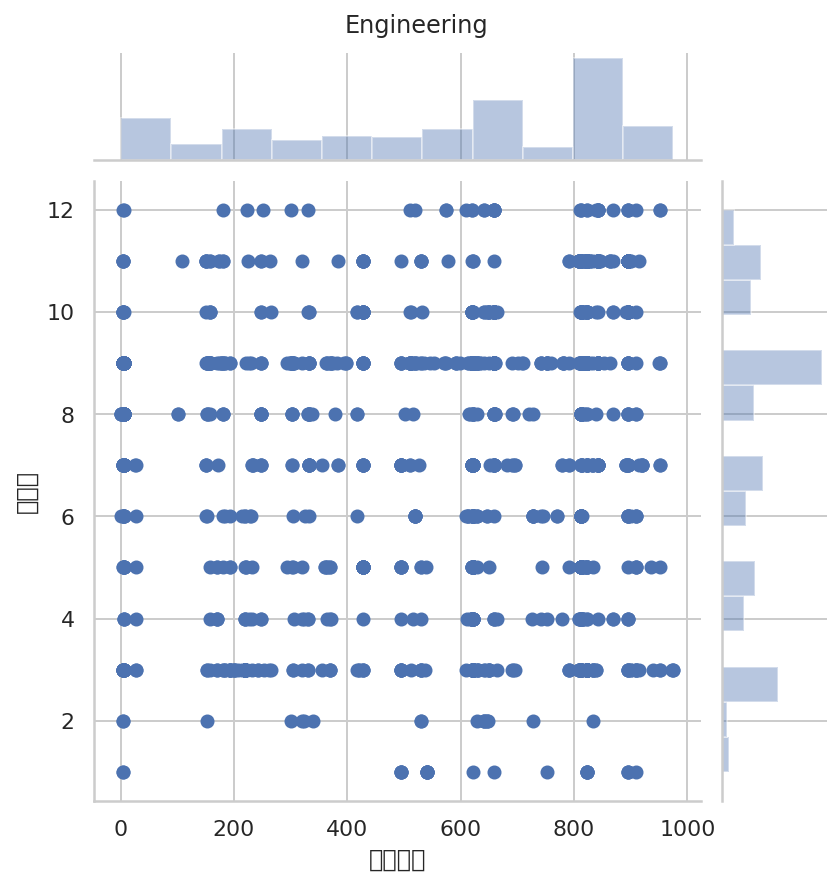

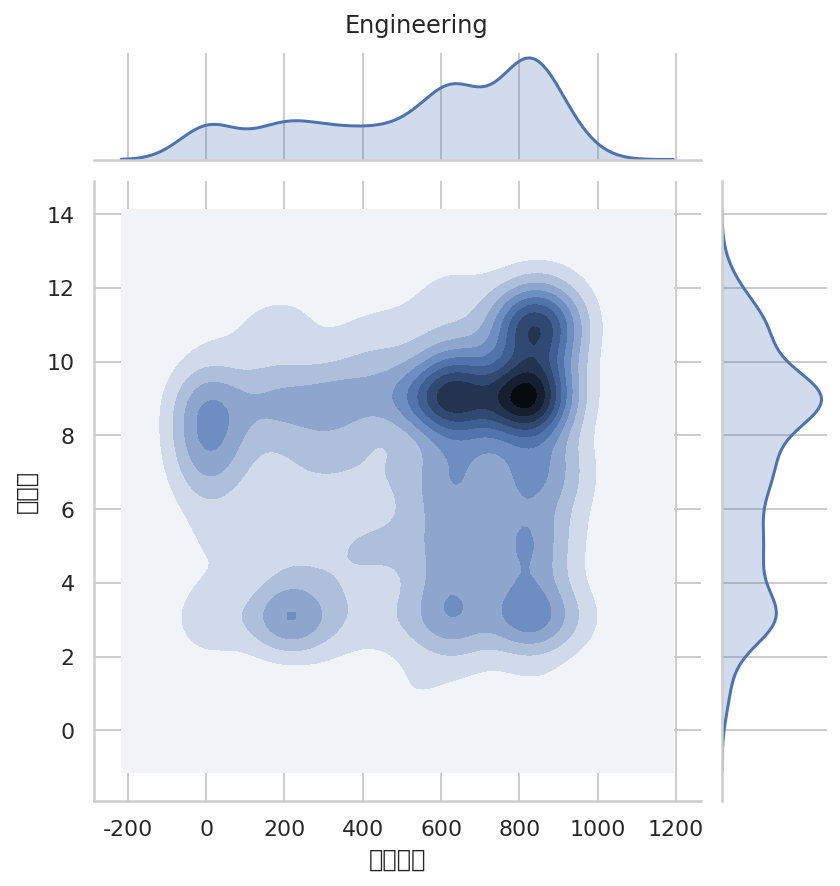

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=dso_eg)
plt.suptitle("Engineering", y=1.02)
plt.show()
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=so_eg, kind="kde")
plt.suptitle("Engineering", y=1.02)
plt.show()

##사범대학 대여권수

In [ ]:
so_edu = so_2[so_2['학과'].isin(['국어교육과','영어교육과','교육학과','역사교육과','미술교육과','수학교육과'])]
#교육연수원, 교직부 제외
so_edu.shape

(2976, 4)

In [ ]:
so_edu.청구기호 = so_edu.청구기호.str.slice(0, 3)
so_edu.대출일 = so_edu.대출일.str.slice(4, 6)

In [ ]:
dso_edu = so_edu.drop(['학과','서명'], axis=1)

In [ ]:
dso_edu['청구기호']= dso_edu['청구기호'].astype('int')
dso_edu['대출일'] = dso_edu['대출일'].astype('int')

In [ ]:
cso_edu = so_edu.청구기호.value_counts().head(15)

In [ ]:
cso_edu = pd.DataFrame({'청구기호':cso_edu.index, 'count':cso_edu.values})

In [ ]:
cso_edu.head(5)

,청구기호,count
0,951,289
1,813,283
2,370,129
3,810,91
4,823,77


2)사범대
  
    1위 951 : 아시아사
    2위 813 : 미국문학
    3위 370 : 교육학
    4위 810 : 미국문학
    5위 823 : 영국문학

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

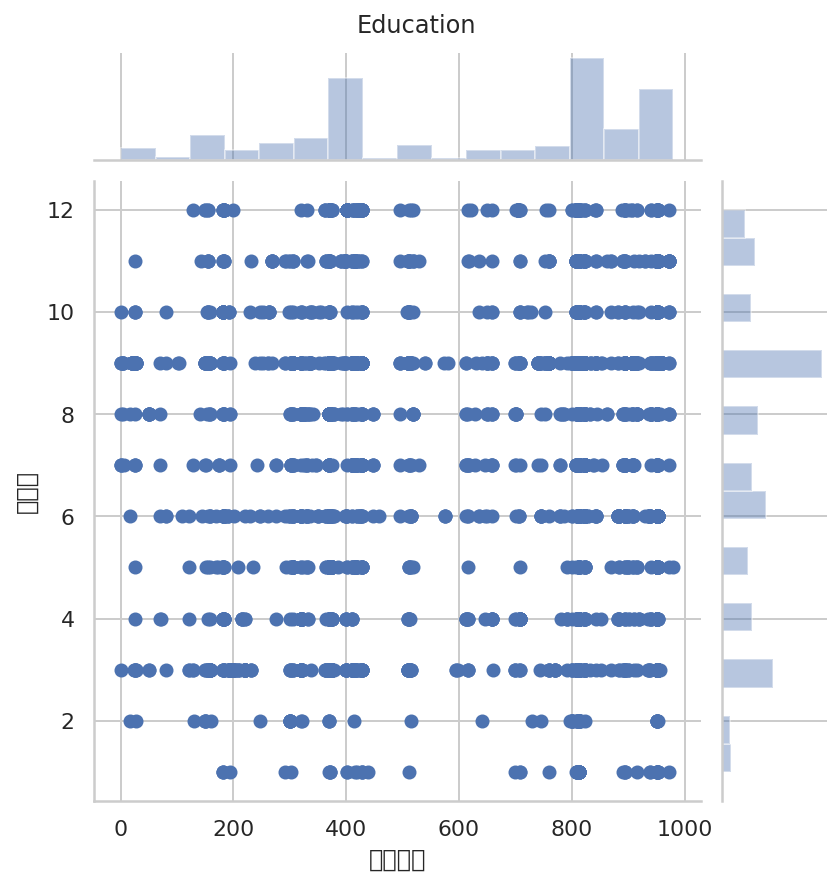

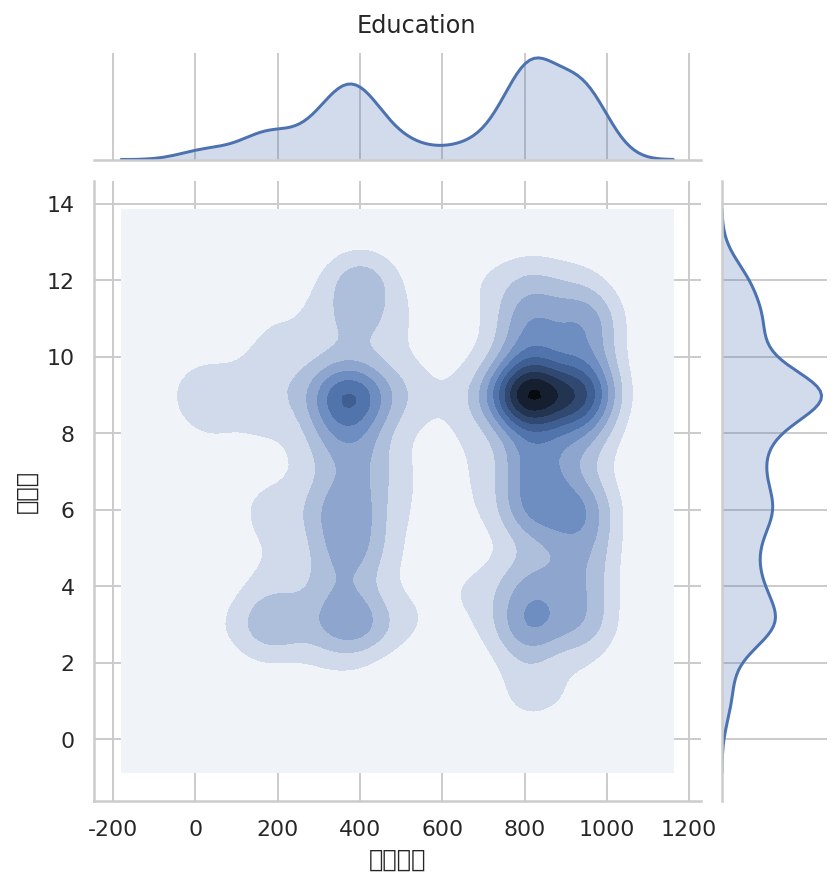

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=dso_edu)
plt.suptitle("Education", y=1.02)
plt.show()
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=so_edu, kind="kde")
plt.suptitle("Education", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=so_edu, kind="kde")
plt.suptitle("Education", y=1.02)
plt.show()

##문과대학 대여권수

In [ ]:
so_la =  so_2[so_2['학과'].isin(['국어국문·창작학과','영어영문학과','외국어문학부','일어일문학전공','프랑스어문학전공',
                                    '문헌정보학과','사학과','기독교학과','인문학부 철학상담학전공','일본·프랑스어문학과'])]
so_la.shape

(4758, 4)

In [ ]:
so_la.청구기호 = so_la.청구기호.str.slice(0, 3)
so_la.대출일 = so_la.대출일.str.slice(4, 6)

In [ ]:
dso_la = so_la.drop(['학과','서명'], axis=1)

In [ ]:
dso_la['청구기호']= dso_la['청구기호'].astype('int')
dso_la['대출일'] = dso_la['대출일'].astype('int')

In [ ]:
cso_la = so_la.청구기호.value_counts().head(15)

In [ ]:
cso_la = pd.DataFrame({'청구기호':cso_la.index, 'count':cso_la.values})

In [ ]:
cso_la.head(5)

,청구기호,count
0,813,611
1,823,319
2,895,257
3,811,188
4,843,138


3)문과대
  
    1위 813 : 미국문학
    2위 823 : 영국문학
    3위 895 : 기타 문학
    4위 811 : 미국문학
    5위 843 : 프랑스문학

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

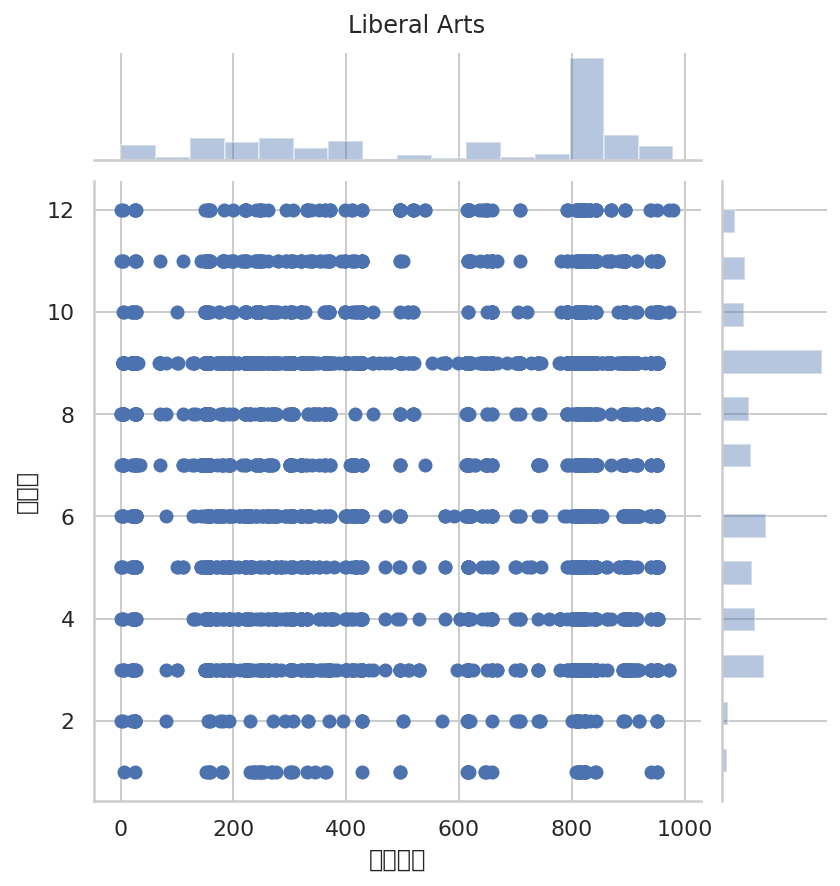

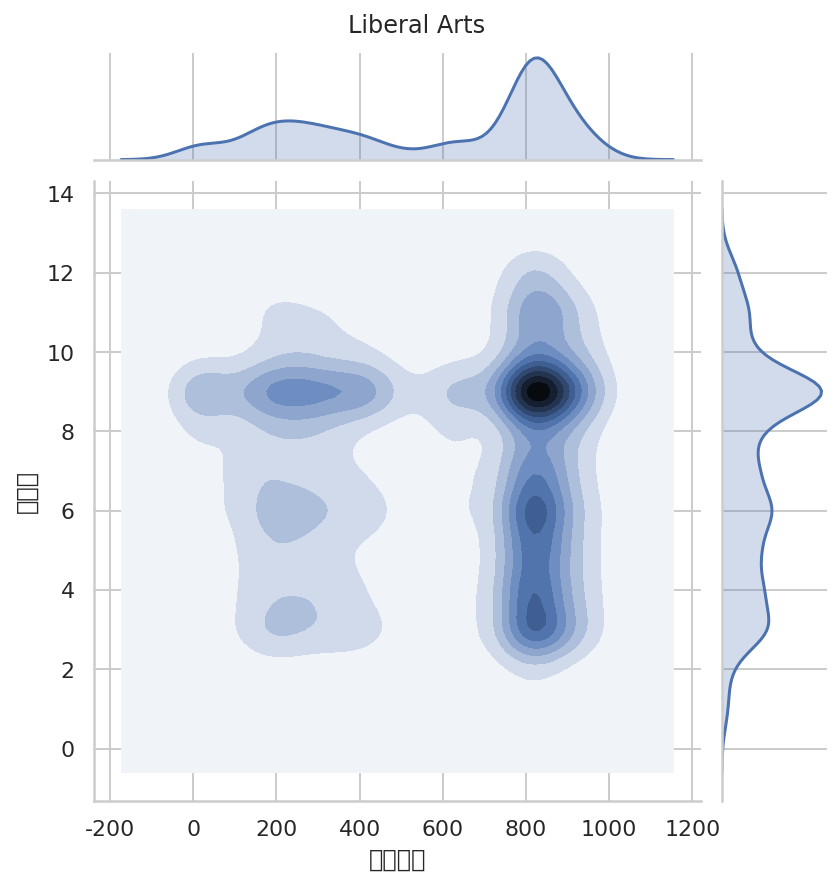

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=dso_la)
plt.suptitle("Liberal Arts", y=1.02)
plt.show()
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=so_la, kind="kde")
plt.suptitle("Liberal Arts", y=1.02)
plt.show()

##경상대학 대여권수

In [ ]:
so_ec =  so_2[so_2['학과'].isin(['경영학과','회계학과','무역학과','경제학부','경제학전공',
                                    '중국경제통상학전공','컨벤션호텔경영학과','비즈니스통계학과'])]
#방촌국제화 훈련단 제외
so_ec.shape

(2395, 4)

In [ ]:
so_ec.청구기호 = so_ec.청구기호.str.slice(0, 3)
so_ec.대출일 = so_ec.대출일.str.slice(4, 6)

In [ ]:
dso_ec = so_ec.drop(['학과','서명'], axis=1)

In [ ]:
dso_ec['청구기호']= dso_ec['청구기호'].astype('int')
dso_ec['대출일'] = dso_ec['대출일'].astype('int')

In [ ]:
cso_ec = so_ec.청구기호.value_counts().head(15)

In [ ]:
cso_ec = pd.DataFrame({'청구기호':cso_ec.index, 'count':cso_ec.values})

In [ ]:
cso_ec.head(5)

,청구기호,count
0,658,169
1,813,152
2,823,122
3,895,113
4,330,107


4)경상대학
  
    1위 658 : 경영 및 보조서비스
    2위 813 : 미국문학
    3위 823 : 영국문학
    4위 895 : 기타 문학
    5위 330 : 경제학

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

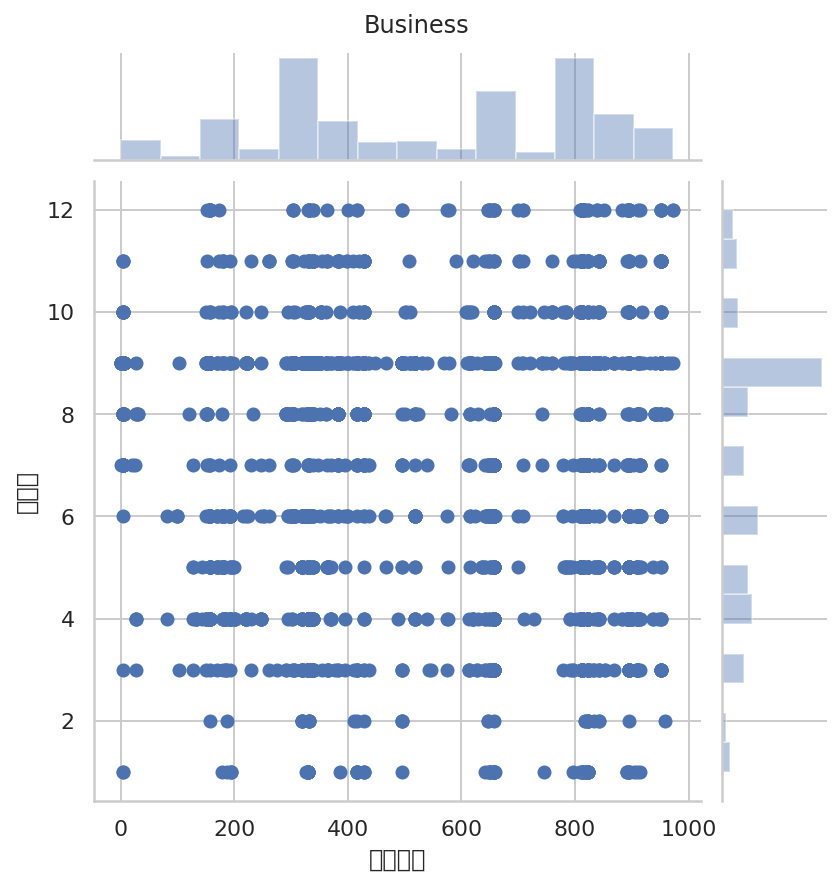

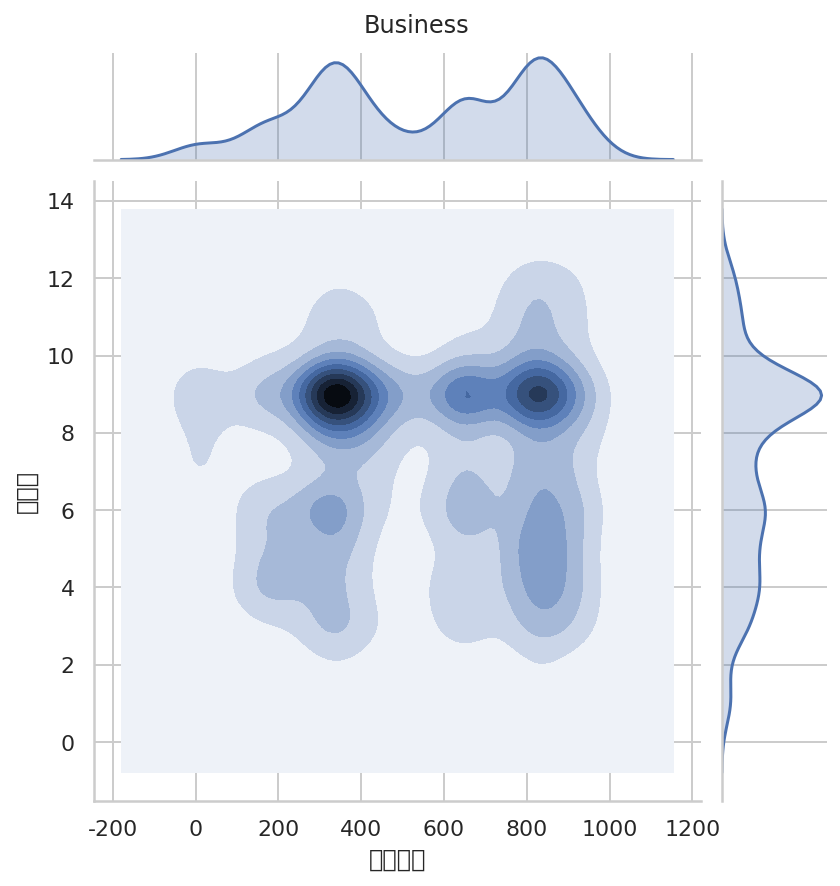

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=dso_ec)
plt.suptitle("Business", y=1.02)
plt.show()
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=so_ec, kind="kde")
plt.suptitle("Business", y=1.02)
plt.show()

##법정대학 대여권수

In [ ]:
so_ss =  so_2[so_2['학과'].isin(['법학부','행정·경찰학부' '행정학전공','경찰학전공 모집전공','정치·언론학과' ,'사회복지학과','아동복지학과','도시부동산학과'])]
so_ss.shape

(1778, 4)

In [ ]:
so_ss.청구기호 = so_ss.청구기호.str.slice(0, 3)
so_ss.대출일 = so_ss.대출일.str.slice(4, 6)

In [ ]:
dso_ss = so_ss.drop(['학과','서명'], axis=1)

In [ ]:
dso_ss['청구기호']= dso_ss['청구기호'].astype('int')
dso_ss['대출일'] = dso_ss['대출일'].astype('int')

In [ ]:
cso_ss = so_ss.청구기호.value_counts().head(15)

In [ ]:
cso_ss = pd.DataFrame({'청구기호':cso_ss.index, 'count':cso_ss.values})

In [ ]:
cso_ss.head(5)

,청구기호,count
0,813,143
1,895,98
2,345,89
3,951,83
4,361,71


5)법정대학
  
    1위 813 : 미국문학
    2위 895 : 기타 문학
    3위 345 : 법률학
    4위 951 : 아시아사
    5위 361 : 사회문제 및 복지

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

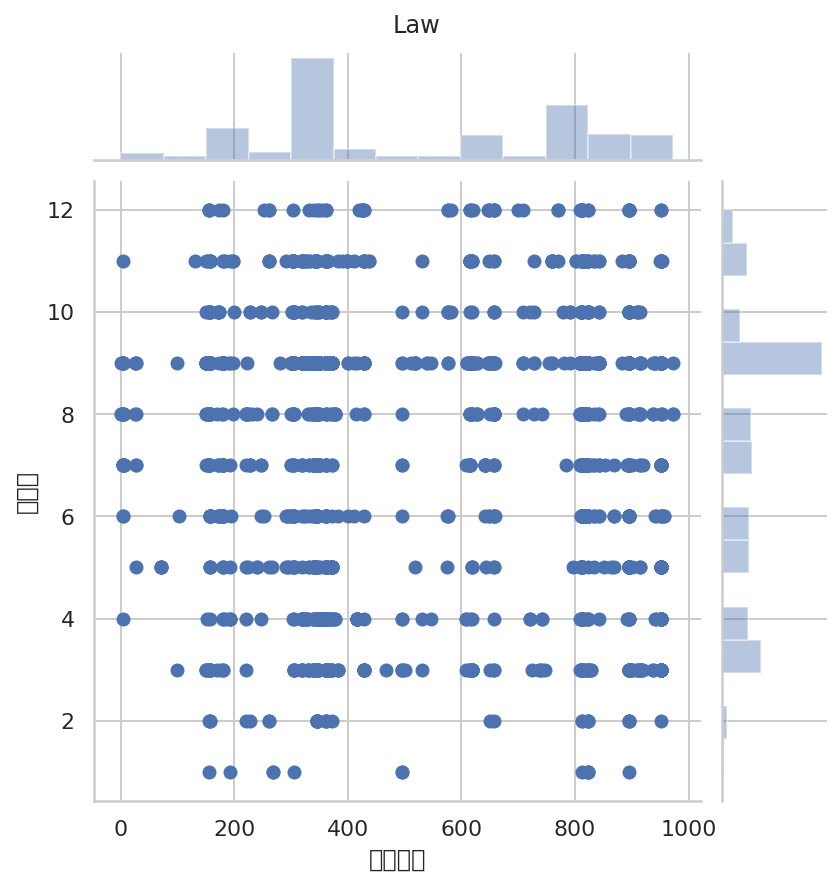

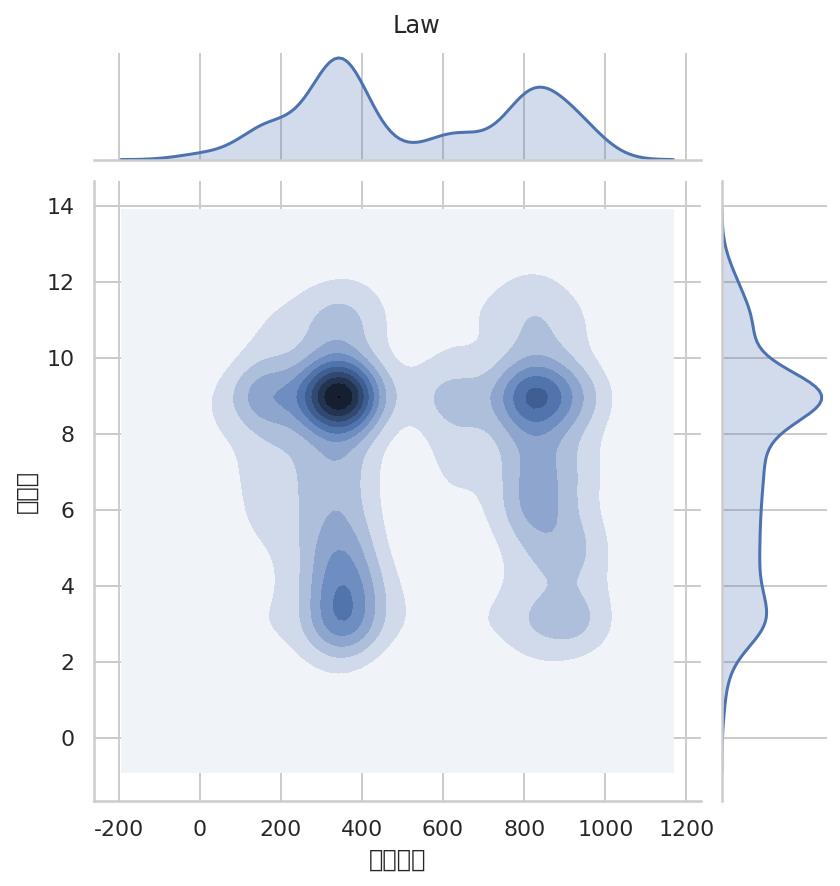

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=dso_ss)
plt.suptitle("Law", y=1.02)
plt.show()
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=so_ss, kind="kde")
plt.suptitle("Law", y=1.02)
plt.show()

##생명나노과학대학 대여권수

In [ ]:
so_ls =  so_2[so_2['학과'].isin(['생명시스템과학과' ,'식품영양학과','화학과' ,'수학과','간호학과','스포츠과학과','화공신소재공학과'])]
so_ls.shape

(2525, 4)

In [ ]:
so_ls.청구기호 = so_ls.청구기호.str.slice(0, 3)
so_ls.대출일 = so_ls.대출일.str.slice(4, 6)

In [ ]:
dso_ls = so_ls.drop(['학과','서명'], axis=1)

In [ ]:
dso_ls['청구기호']= dso_ls['청구기호'].astype('int')
dso_ls['대출일'] = dso_ls['대출일'].astype('int')

In [ ]:
cso_ls = so_ls.청구기호.value_counts().head(15)

In [ ]:
cso_ls = pd.DataFrame({'청구기호':cso_ls.index, 'count':cso_ls.values})

In [ ]:
cso_ls.head(5)

,청구기호,count
0,895,186
1,813,151
2,574,115
3,610,102
4,823,94


6)생명나노대학
  
    1위 895 : 기타 문학
    2위 813 : 미국문학
    3위 574 : 생명과학, 생물학
    4위 610 : 의학 및 보건
    5위 820 : 영국문학

##사회적경제융합대학 대여권수

In [ ]:
so_se =  so_2[so_2['학과'].isin(['사회복지학과','아동복지학과'])]
                               
#상담심리학과 , 사회적경제기업학과 , 빅데이터응용학과 신규 생성학과 제외
so_se.shape

(820, 4)

In [ ]:
so_se.청구기호 = so_se.청구기호.str.slice(0, 3)
so_se.대출일 = so_se.대출일.str.slice(4, 6)

In [ ]:
dso_se = so_se.drop(['학과','서명'], axis=1)

In [ ]:
dso_se['청구기호']= dso_se['청구기호'].astype('int')
dso_se['대출일'] = dso_se['대출일'].astype('int')

In [ ]:
cso_se = so_se.청구기호.value_counts().head(15)

In [ ]:
cso_se = pd.DataFrame({'청구기호':cso_se.index, 'count':cso_se.values})

In [ ]:
cso_se.head(5)

,청구기호,count
0,813,73
1,361,65
2,951,46
3,158,39
4,362,36


7)사회적경제융합대학
  
    1위 813 : 미국문학
    2위 361 : 사회문제 및 복지
    3위 951 : 아시아사
    4위 158 : 심리학
    5위 362 : 사회문제 및 복지

##린튼글로벌비지니스 대여권수

In [ ]:
so_gb =  so_2[so_2['학과'].isin(['글로벌비즈니스전공','글로벌IT경영전공'])]
so_gb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
학과      0 non-null object
청구기호    0 non-null object
서명      0 non-null object
대출일     0 non-null object
dtypes: object(4)
memory usage: 0.0+ bytes


8)린튼글로벌비지니스 - 값이 없음

##조형예술학부 대여권수

In [ ]:
so_art =  so_2[so_2['학과'].isin(['조형예술학부','융합디자인전공','회화전공','의류학전공'])]
so_art.shape

(860, 4)

In [ ]:
so_art.청구기호 = so_art.청구기호.str.slice(0, 3)
so_art.대출일 = so_art.대출일.str.slice(4, 6)

In [ ]:
dso_art = so_art.drop(['학과','서명'], axis=1)

In [ ]:
dso_art['청구기호']= dso_art['청구기호'].astype('int')
dso_art['대출일'] = dso_art['대출일'].astype('int')

In [ ]:
cso_art = so_art.청구기호.value_counts().head(15)

In [ ]:
cso_art = pd.DataFrame({'청구기호':cso_art.index, 'count':cso_art.values})

In [ ]:
cso_art.head(5)

,청구기호,count
0,745,53
1,741,45
2,813,41
3,709,38
4,759,31


9)조형예술학부
  
    1위 745 : 그래픽아트, 장식예술
    2위 741 : 그래픽아트, 장식예술
    3위 813 : 미국문학
    4위 709 : 예술 및 장식 미술
    5위 759 : 회화

##자유전공학부 대여권수

In [ ]:
so_free =  so_2[so_2['학과'].isin(['자유전공학부'])]
so_free.shape

(60, 4)

In [ ]:
so_free.청구기호 = so_free.청구기호.str.slice(0, 3)
so_free.대출일 = so_free.대출일.str.slice(4, 6)

In [ ]:
dso_free = so_free.drop(['학과','서명'], axis=1)

In [ ]:
dso_free['청구기호']= dso_free['청구기호'].astype('int')
dso_free['대출일'] = dso_free['대출일'].astype('int')

In [ ]:
cso_free = so_free.청구기호.value_counts().head(15)

In [ ]:
cso_free = pd.DataFrame({'청구기호':cso_free.index, 'count':cso_free.values})

In [ ]:
cso_free.head(5)

,청구기호,count
0,813,11
1,843,4
2,818,4
3,179,3
4,823,3


10)자유전공학부
  
    1위 813 : 미국문학
    2위 843 : 프랑스문학
    3위 818 : 미국문학
    4위 823 : 영국문학
    5위 895 : 기타 문학

## 대학별 도서 선호 장르

1)공과대
  
    1위 813 : 미국문학
    2위 823 : 영국문학
    3위 621 : 공학
    4위 620 : 공학
    5위 006 : 총류


2)사범대
  
    1위 951 : 아시아사
    2위 813 : 미국문학
    3위 370 : 교육학
    4위 810 : 미국문학
    5위 823 : 영국문학


3)문과대
  
    1위 813 : 미국문학
    2위 823 : 영국문학
    3위 895 : 기타 문학
    4위 811 : 미국문학
    5위 843 : 프랑스문학


4)경상대학
  
    1위 658 : 경영 및 보조서비스
    2위 813 : 미국문학
    3위 823 : 영국문학
    4위 895 : 기타 문학
    5위 330 : 경제학


5)법정대학
  
    1위 813 : 미국문학
    2위 895 : 기타 문학
    3위 345 : 법률학
    4위 951 : 아시아사
    5위 361 : 사회문제 및 복지


6)생명나노대학
  
    1위 895 : 기타 문학
    2위 813 : 미국문학
    3위 574 : 생명과학, 생물학
    4위 610 : 의학 및 보건
    5위 820 : 영국문학


7)사회적경제융합대학
  
    1위 813 : 미국문학
    2위 361 : 사회문제 및 복지
    3위 951 : 아시아사
    4위 158 : 심리학
    5위 362 : 사회문제 및 복지


8)린튼글로벌비지니스 - 값이 없음 


9)조형예술학부
  
    1위 745 : 그래픽아트, 장식예술
    2위 741 : 그래픽아트, 장식예술
    3위 813 : 미국문학
    4위 709 : 예술 및 장식 미술
    5위 759 : 회화


10)자유전공학부
  
    1위 813 : 미국문학
    2위 843 : 프랑스문학
    3위 818 : 미국문학
    4위 823 : 영국문학
    5위 895 : 기타 문학


### 대학별 청구기호와 대출월 관련 그래프

#### sns.barplot

In [ ]:
sns.set_style("whitegrid")
sns.barplot(x="청구기호", y="대출일", data=dso_eg)
plt.suptitle("Engineering", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.barplot(x="청구기호", y="대출일", data=dso_edu)
plt.suptitle("Education", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.barplot(x="청구기호", y="대출일", data=dso_la)
plt.suptitle("Liberal Arts", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.barplot(x="청구기호", y="대출일", data=dso_ec)
plt.suptitle("Business", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.barplot(x="청구기호", y="대출일", data=dso_ss)
plt.suptitle("Law", y=1.02)
plt.show()

#### sns.jointplot

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=dso_eg)
plt.suptitle("Engineering", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=dso_edu)
plt.suptitle("Education", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=dso_la)
plt.suptitle("Liberal Arts", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=dso_ec)
plt.suptitle("Business", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=dso_ss)
plt.suptitle("Law", y=1.02)
plt.show()

#### sns.jointplot_kde

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=so_eg, kind="kde")
plt.suptitle("Engineering", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=so_edu, kind="kde")
plt.suptitle("Education", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=so_la, kind="kde")
plt.suptitle("Liberal Arts", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=so_ec, kind="kde")
plt.suptitle("Business", y=1.02)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=so_ss, kind="kde")
plt.suptitle("Law", y=1.02)
plt.show()

#### 대학별 청구기호를 이용한 선호 장르 barplot

In [ ]:
eg = cso_eg.plot(kind='bar', x='청구기호', y='count', title='Engineering', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), fontsize=12)
#eg.set_xlabel('서명', fontsize=12)          # x축 정보 표시
#eg.set_ylabel('LB_sum', fontsize=12)     # y축 정보 표시
#eg.legend(['LB_sum'], fontsize=12)    # 범례 지정

In [ ]:
edu = cso_edu.plot(kind='bar', x='청구기호', y='count', title='Education', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), fontsize=12)

In [ ]:
la = cso_la.plot(kind='bar', x='청구기호', y='count', title='Liberal Arts', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), fontsize=12)

In [ ]:
ec = cso_ec.plot(kind='bar', x='청구기호', y='count', title='Business', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), fontsize=12)

In [ ]:
ss = cso_ss.plot(kind='bar', x='청구기호', y='count', title='Law', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), fontsize=12)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_te

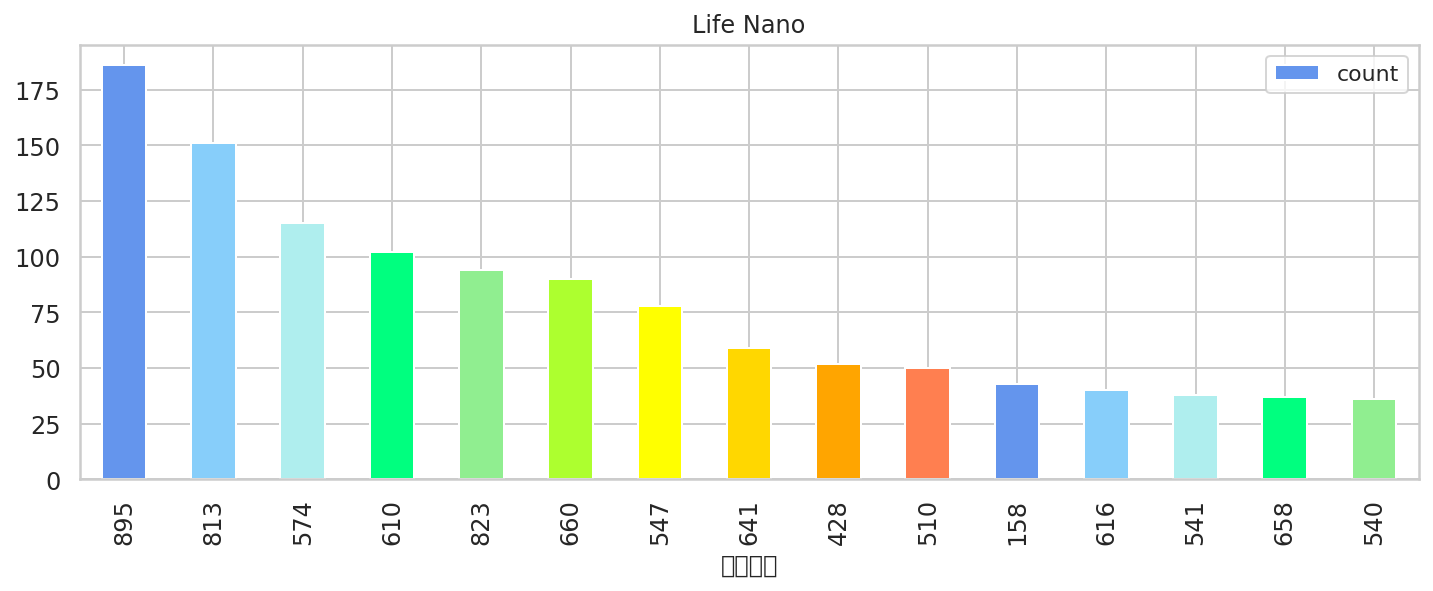

In [ ]:
ls = cso_ls.plot(kind='bar', x='청구기호', y='count', title='Life Nano', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), fontsize=12)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_te

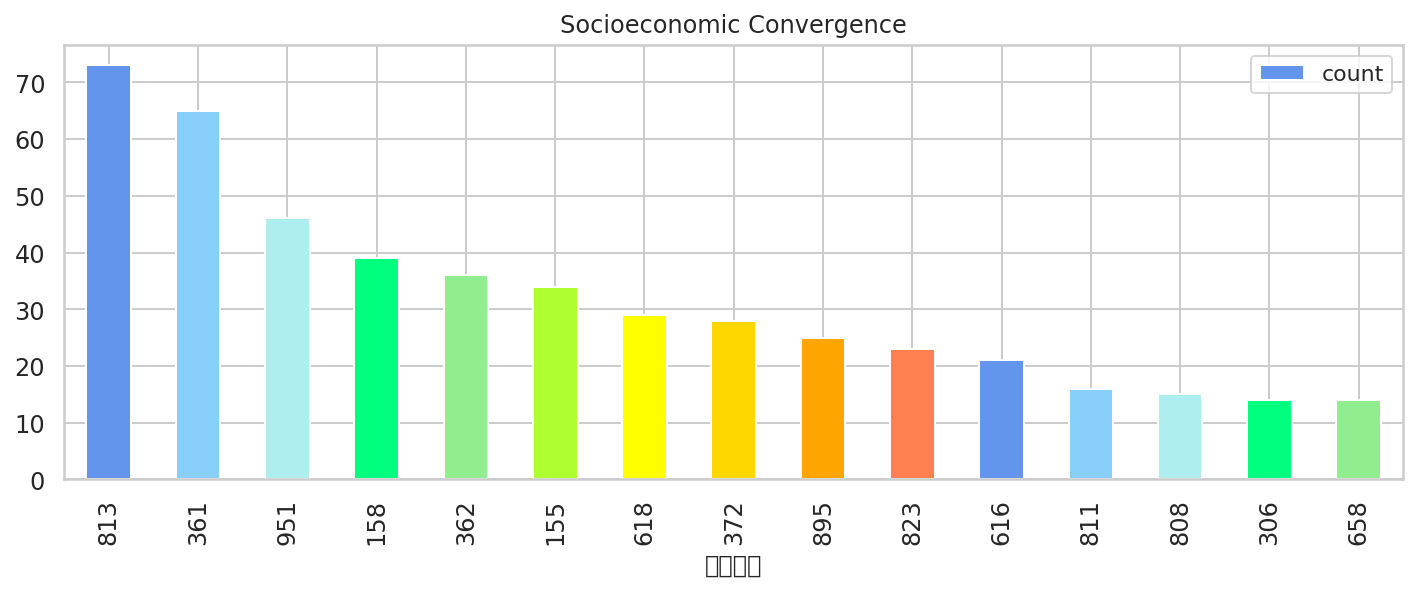

In [ ]:
se = cso_se.plot(kind='bar', x='청구기호', y='count', title='Socioeconomic Convergence', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), fontsize=12)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_te

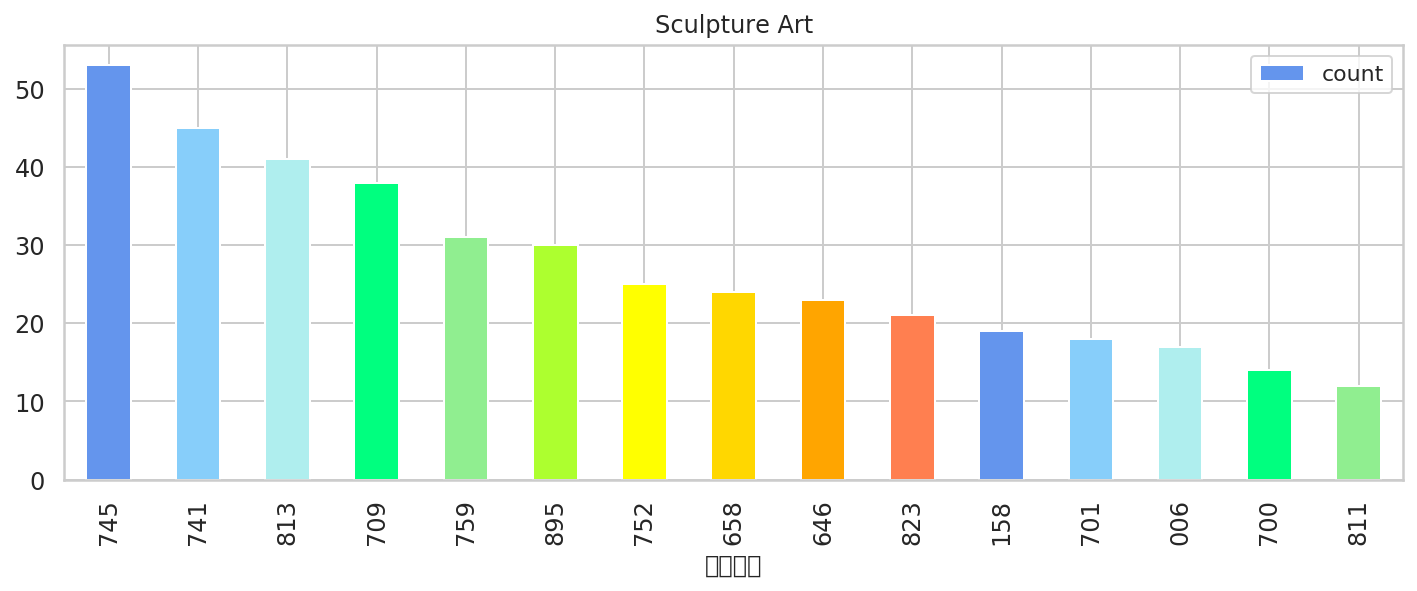

In [ ]:
art = cso_art.plot(kind='bar', x='청구기호', y='count', title='Sculpture Art', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), fontsize=12)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_te

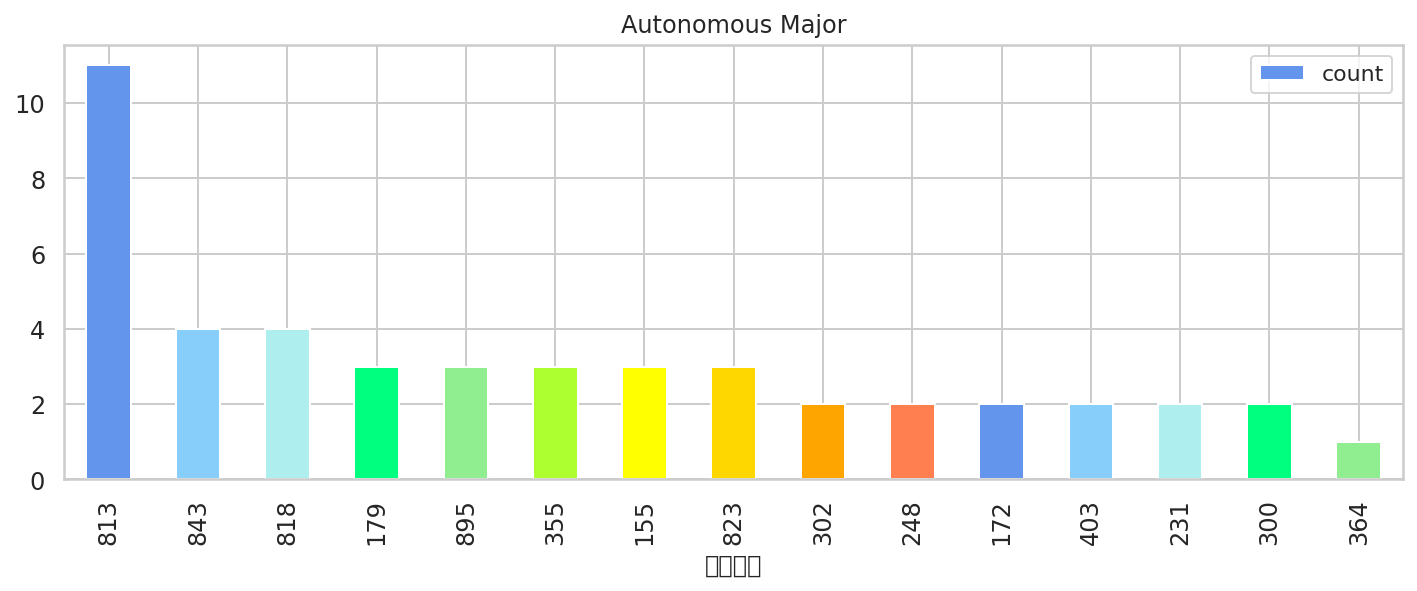

In [ ]:
free = cso_free.plot(kind='bar', x='청구기호', y='count', title='Autonomous Major', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), fontsize=12)

## 전체 데이터

### 코딩

In [ ]:
so_t = pd.concat([so_eg,so_edu,so_la,so_ec ,so_ss,so_ls , so_se,so_gb , so_art, so_free])
so_t = so_t.reset_index()

In [ ]:
so_t.청구기호 = so_t.청구기호.str.slice(0, 1)
so_t.대출일 = so_t.대출일.str.slice(4, 6)

In [ ]:
so_t.청구기호 = so_t.청구기호.str.pad(width=3, side='right', fillchar='0')

In [ ]:
dso_t = so_t.drop(['학과','서명'], axis=1)

In [ ]:
dso_t['청구기호']= dso_t['청구기호'].astype('int')
dso_t['대출일'] = dso_t['대출일'].astype('int')

ValueError: ignored

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_

TypeError: ignored

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0,

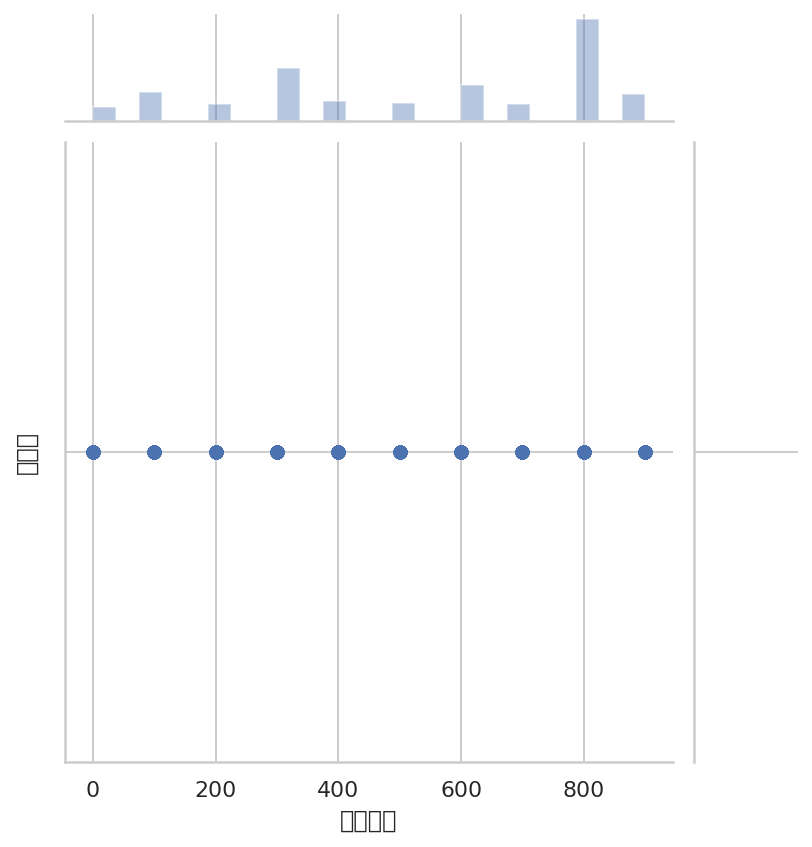

In [ ]:
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=dso_t)
plt.suptitle("All", y=1.02)
plt.show()
sns.set_style("whitegrid")
sns.jointplot(x="청구기호", y="대출일", data=so_t, kind="kde")
plt.suptitle("All", y=1.02)
plt.show()

In [ ]:
cso_t = so_t.청구기호.value_counts().head(15)
cso_t = pd.DataFrame({'청구기호':cso_t.index, 'count':(cso_t.values/17516)*100})
cso_t['count'] = cso_t['count'].astype(int)

In [ ]:
dso_tt

,대출일,청구기호,0
0,,000,747
1,,100,1510
2,,200,870
3,,300,2813
4,,400,1031
5,,500,946
6,,600,1876
7,,700,882
8,,800,5403
9,,900,1438


In [ ]:
dso_tt = so_t.groupby(['대출일', '청구기호']).size().reset_index()
print(dso_tt[dso_tt.대출일 == '12'])

Empty DataFrame
Columns: [대출일, 청구기호, 0]
Index: []


### 요약

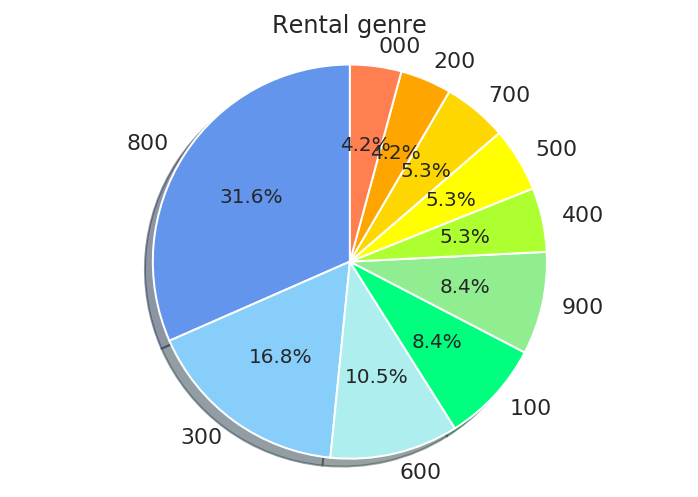

In [ ]:
sizes = cso_t['count']
colors = ['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral']
explode = cso_t['count']
plt.title("Rental genre")
plt.pie(sizes , labels=cso_t['청구기호'], colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

> 선호 장르

    1위 800(30.85%) : 문학
    2위 300(16.06%) : 사회학
    3위 600(10.71%) : 기술과학
    4위 100(8.62%) : 철학
    5위 900(8.21%) : 역사

> 대출월별 청구기호

    1월 800(115) > 600(35) > 300(31) > 400(27)
    2월 800(78) > 300(46) > 300(37) > 100(24)
    3월 800(524) > 300(325) > 500(204) > 900(183)
    4월 800(404) > 300(251) > 600(146) > 900(141)
    5월 800(423) > 300(245) > 600(138) > 100, 900(137)
    6월 800(556) > 300(256) > 600(186) > 100(169)
    7월 800(522) > 600(186) > 300(167) > 100(131)
    8월 800(357) > 300(235) > 600(151) > 900(136)
    9월 800(1415) > 300(907) > 600(499) > 100(404)
    10월 800(348) > 300(123) > 600(122) > 900(92)
    11월 800(466) > 300(161) > 900(113) > 600(104)
    12월 800(195) > 600(103) > 400(81) > 300(66)
